<a href="https://colab.research.google.com/github/Iinayah/Tugas6_DataMining-/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [15]:
#Load Dataset
data = pd.read_csv('datalulus.csv')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ip1     1687 non-null   float64
 1   ip2     1687 non-null   float64
 2   ip3     1687 non-null   float64
 3   ip4     1687 non-null   float64
 4   tepat   1687 non-null   object 
dtypes: float64(4), object(1)
memory usage: 66.0+ KB


In [17]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [18]:
data["tepat"] = pd.factorize(data.tepat)[0]

In [19]:
data.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,0
1,1.81,1.68,1.57,1.86,0
2,3.07,3.00,2.75,3.21,0
3,2.71,2.33,2.61,1.98,0
4,3.17,3.02,3.28,2.96,0


In [20]:
#Mengubah dataFrame ke array Numpy
data = data.to_numpy()

In [21]:
print(data)

[[2.3  1.97 1.8  1.56 0.  ]
 [1.81 1.68 1.57 1.86 0.  ]
 [3.07 3.   2.75 3.21 0.  ]
 ...
 [3.31 3.25 3.44 3.52 1.  ]
 [3.44 3.35 3.5  3.5  1.  ]
 [3.18 3.05 3.05 3.27 1.  ]]


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [23]:
len(x_train)

1265

In [24]:
len(x_test)

422

In [25]:
#Membuat Objek Model Decision Tree
decisiontree = DecisionTreeClassifier(random_state=0, max_depth=None, 
                                      min_samples_split=2, min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None, 
                                      min_impurity_decrease=0)

In [26]:
#Mentraining Model Decision Tree
model = decisiontree.fit(x, y)

In [27]:
test = model.predict(x)

In [28]:
test

array(['Tidak', 'Tidak', 'Tidak', ..., 'Ya', 'Ya', 'Ya'], dtype=object)

In [29]:
#Mengambil sampel observasi dan membuat prediksi
#Sampel berupa data dimensi kelopak
#Fungsi predict() => memeriksa kelas yang dimilikinya
#Fungsi predict_proba() => memeriksa probabilitas kelas dari prediksi tersebut
observation = [[5, 4, 3, 2]]
model.predict(observation)
model.predict_proba(observation)

print(observation)
print(model.predict(observation))

[[5, 4, 3, 2]]
['Tidak']


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, test)
print(cm)

[[ 135    0]
 [   0 1552]]


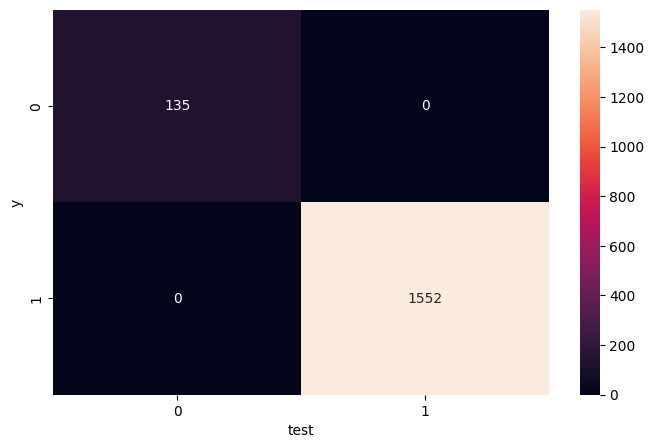

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y, test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("test")
plt.ylabel("y")
plt.show()

In [32]:
from sklearn.metrics import classification_report
print (classification_report(y, test))

              precision    recall  f1-score   support

       Tidak       1.00      1.00      1.00       135
          Ya       1.00      1.00      1.00      1552

    accuracy                           1.00      1687
   macro avg       1.00      1.00      1.00      1687
weighted avg       1.00      1.00      1.00      1687



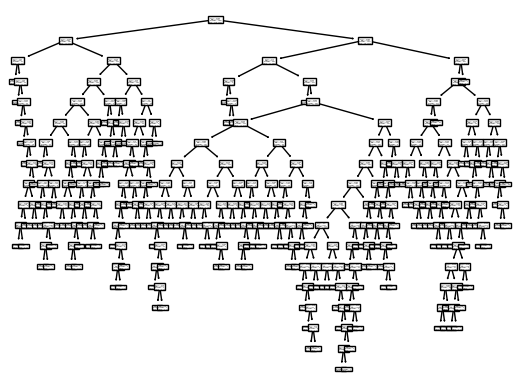

In [33]:
tree.plot_tree(decisiontree)
plt.show()

In [63]:
#Memecah Dataset ke Input dan Label
inputTraining = x_train[:, 0:5]
inputTesting = x_test[:, 0:5]
labelTraining = y_train[ 5]
labelTesting = y_test[ 5]

In [64]:
#Mendefinisikan Decision Tree Classifier
model = tree.DecisionTreeClassifier()

In [65]:
#Mentraining Model
model = model.fit(x_train, y_train)

In [66]:
#Memprediksi Input Data Testing
hasilPrediksi = model.predict(x_test)
print("Label Sebenarnya : ", y_test)
print("Hasil Prediksi : ", hasilPrediksi)

Label Sebenarnya :  ['Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Tidak' 'Ya' 'Ya' 'Tidak' 'Ya' 'Ya' 'Ya' 'Ya'
 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya'
 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Tidak' 'Ya' 'Ya' 'Tidak' 'Ya'
 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya'
 'Ya' 'Ya' 'Tidak' 'Tidak' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya'
 'Ya' 'Tidak' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya'
 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Tidak'
 'Ya' 'Tidak' 'Ya' 'Ya' 'Ya' 'Tidak' 'Ya' 'Ya' 'Tidak' 'Ya' 'Ya' 'Ya' 'Ya'
 'Ya' 'Tidak' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Tidak' 'Tidak'
 'Ya' 'Tidak' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Tidak' 'Ya' 'Ya' 'Ya' 'Ya'
 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Tidak' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya'
 'Ya' 'Ya' 'Ya' 'Ya' 'Tidak' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Tidak' 'Tidak' 'Ya'
 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Tidak' 'Ya' 'Ya'
 'Ya' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya

In [53]:
#Menghitung Akurasi
prediksiBenar = (hasilPrediksi == y_test).sum()
prediksiSalah = (hasilPrediksi != y_test).sum()
print("Prediksi Benar :", prediksiBenar, "data")
print("Prediksi Salah :", prediksiSalah, "data")
print("Akurasi :", prediksiBenar/(prediksiBenar+prediksiSalah) * 100, "%")

Prediksi Benar : 339 data
Prediksi Salah : 83 data
Akurasi : 80.33175355450237 %
